In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv("data/triples.txt", sep= " ", header=None, names=['Artiste1', 'Lien', 'Artiste2','.'])

In [84]:
metadata = pd.read_csv('data/metadata_dataframe.csv')

In [85]:
from ast import literal_eval
def fix_list(l):
    try:
        return literal_eval(l)
    except ValueError:
        return None
metadata.Genre = metadata.Genre.apply(fix_list)

In [86]:
unic_genre = []
for genres in metadata.Genre:
    try:
        for i in range(len(genres)):
            unic_genre.append(genres[i])
    except:
        pass
from collections import Counter
unic_genre = Counter(unic_genre)

In [88]:
def unic_style(genres):
    try:
        if genres == ['Jazz']:
            return 'Jazz'
        elif len(genres) == 1:
            return genres[0]
        else:
            for i in range(len(unic_genre)):
                if unic_genre.most_common()[i][0] in genres and len(genres)>1:
                    genres.remove(unic_genre.most_common()[i][0])
            return genres[0]
    except (ValueError, TypeError):
        return None

In [89]:
metadata['Test'] = metadata.Genre.apply(unic_style)

In [93]:
len(metadata)

983

In [91]:
metadata.tail(20)

,artist_url,Associated Artists,Associated Bands,Background,Birth Place,Birth Year,Death Place,Death Year,Genre,Instruments,Name,Test
963,<http://dbpedia.org/resource/Al_Tinney>,NaN,NaN,NaN,NaN,1921.0,NaN,2002.0,None,['Tinney'],Al Tinney,None
964,<http://dbpedia.org/resource/Andy_Simpkins>,"['Sarah_Vaughan', 'Pat_Boone', 'The_Three_Soun...","['Sarah_Vaughan', 'Pat_Boone', 'The_Three_Soun...",non_vocal_instrumentalist,NaN,1932.0,Los_Angeles,1999.0,[Jazz],['Double-bassist'],Andy Simpkins,Jazz
965,<http://dbpedia.org/resource/Sherman_Ferguson>,"['Catalyst_(band)', 'Heard_Ranier_Ferguson']","['Catalyst_(band)', 'Heard_Ranier_Ferguson']",non_vocal_instrumentalist,['Philadelphia'],1944.0,NaN,2006.0,[Jazz],['Drums'],Sherman Ferguson,Jazz
966,<http://dbpedia.org/resource/Jimmy_Harrison>,NaN,NaN,NaN,NaN,1900.0,NaN,1931.0,None,['Harrison'],Jimmy Harrison,None
967,<http://dbpedia.org/resource/Jimmy_Archey>,"['King_Oliver', 'Fats_Waller', 'James_P._Johns...","['King_Oliver', 'Fats_Waller', 'James_P._Johns...",non_vocal_instrumentalist,"['Norfolk,_Virginia']",1902.0,"Amityville,_New_York",1967.0,[Dixieland],['Trombone'],Jimmy Archey,Dixieland
968,<http://dbpedia.org/resource/Morey_Feld>,"['Benny_Goodman', 'Ben_Pollack', 'Billy_Butter...","['Benny_Goodman', 'Ben_Pollack', 'Billy_Butter...",non_vocal_instrumentalist,['Cleveland'],1915.0,"Bow_Mar,_Colorado",1971.0,[Jazz],['Drum_kit'],Morey Feld,Jazz
969,<http://dbpedia.org/resource/Mundell_Lowe>,NaN,NaN,non_vocal_instrumentalist,"['Laurel,_Mississippi']",1922.0,NaN,NaN,[Soundtrack],['Guitar'],Mundell Lowe,Soundtrack
970,<http://dbpedia.org/resource/Doc_Severinsen>,"['Benny_Goodman', 'Tommy_Dorsey', 'The_Tonight...","['Benny_Goodman', 'Tommy_Dorsey', 'The_Tonight...",non_vocal_instrumentalist,"['Arlington,_Oregon', 'Oregon']",1927.0,NaN,NaN,[Jazz],['Trumpet'],Doc Severinsen,Jazz
971,<http://dbpedia.org/resource/Roy_Kral>,NaN,NaN,NaN,"['Cicero,_Illinois']",1921.0,"Montclair,_New_Jersey",2002.0,None,['Pianist'],Roy Kral,None
972,<http://dbpedia.org/resource/Jackie_Cain>,NaN,NaN,NaN,['Milwaukee'],1928.0,"Montclair,_New_Jersey",2014.0,None,['Vocalist'],Jackie Cain,None


In [10]:
corresp = metadata[["artist_url", 'Name']].set_index('artist_url').to_dict()

In [11]:
def url_to_artist(url):
    return corresp['Name'][url]

df.Artiste1 = df.Artiste1.apply(url_to_artist)
df.Artiste2 = df.Artiste2.apply(url_to_artist)
df = df[['Artiste1', 'Artiste2']]

In [12]:
adjacency_matrix = pd.crosstab(df.Artiste1, df.Artiste2)
idx = adjacency_matrix.columns.union(adjacency_matrix.index)
adjacency_matrix = adjacency_matrix.reindex(index = idx, columns=idx, fill_value=0).as_matrix()

In [13]:
(adjacency_matrix == 0).sum().sum()/np.prod(adjacency_matrix.shape)

0.9969668887963349

In [14]:
adjacency_matrix.sum()

2913

In [15]:
G = nx.from_numpy_matrix(adjacency_matrix)

Text(0.5,0,'rank')

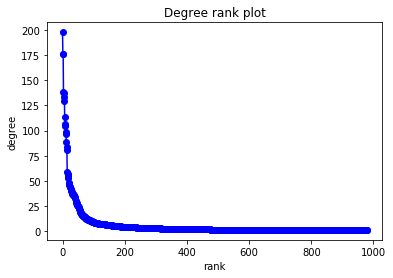

In [16]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)

plt.plot(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

In [17]:
nx.closeness_centrality(G).values()

dict_values([0.3861932938856016, 0.27354009499860293, 0.3238504796559709, 0.2925881649731022, 0.2663220892274211, 0.27546426561620707, 0.2641662169454938, 0.3636701337295691, 0.3719604863221885, 0.3674924924924925, 0.3257903494176373, 0.3385200553250346, 0.33344686648501365, 0.3464260438782732, 0.30253399258343633, 0.3238504796559709, 0.2991139627253284, 0.3901952969310482, 0.31652117685095377, 0.3162144702842377, 0.30197409006785936, 0.27469135802469136, 0.27718006795016986, 0.29364127174565086, 0.31539948453608246, 0.2967565929069415, 0.27718006795016986, 0.27718006795016986, 0.3121811224489796, 0.31560283687943264, 0.30197409006785936, 0.37567152724481967, 0.27718006795016986, 0.2991139627253284, 0.27867919157415316, 0.3679068019541526, 0.2991139627253284, 0.3442334739803094, 0.27354009499860293, 0.3284132841328413, 0.29364127174565086, 0.4271378708551483, 0.4108266890474192, 0.33746983798690106, 0.4447978191731031, 0.32193357448207827, 0.29364127174565086, 0.29364127174565086, 0.30

In [ ]:
G.edges